# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [ ]:
import numpy as np
matriz = np.array([[1,2,3],[4,5,6],[7,8,9]])

print('Matriz=\n', matriz)

# Norma l_0
norma_l0 = np.count_nonzero(matriz, axis=1)

# Norma l_1
norma_l1 = np.sum(np.abs(matriz), axis=1)

# Norma l_2
norma_l2 = np.power(np.sum(np.power(np.abs(matriz), 2), axis=1), 0.5)

# Norma l_inf
norma_linf = np.amax(np.abs(matriz), axis=1)

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [ ]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

c:\Users\Santiago Achaval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Número de componentes para el 80% de la varianza: 27


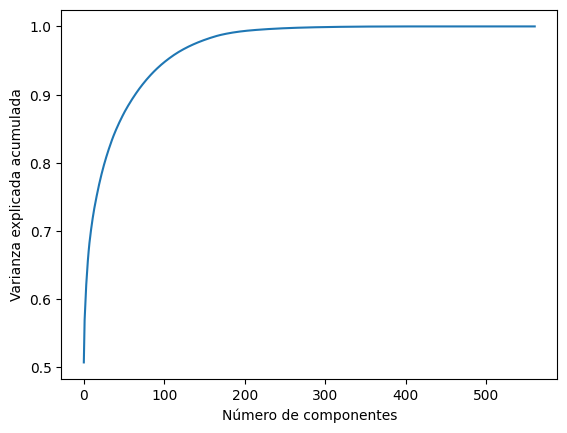

c:\Users\Santiago Achaval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Santiago Achaval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


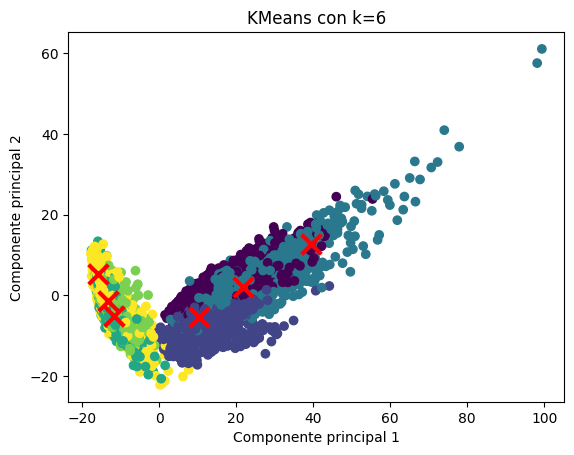

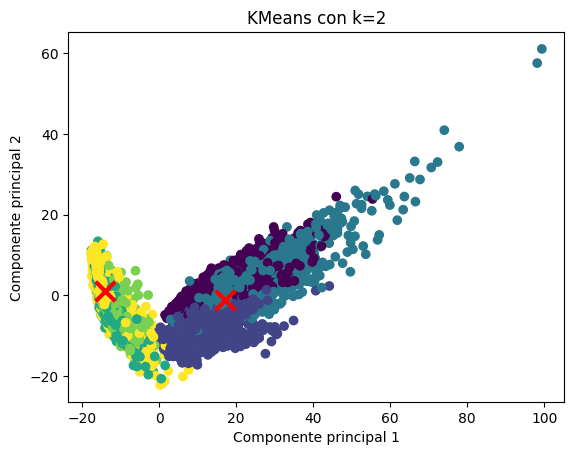

Número de componentes para el 80% de la varianza: 13


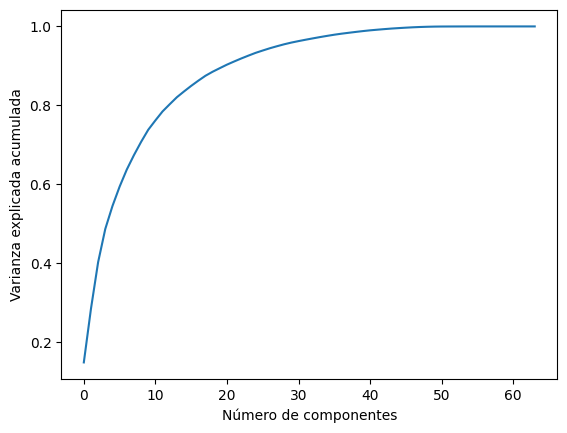

c:\Users\Santiago Achaval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Santiago Achaval\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


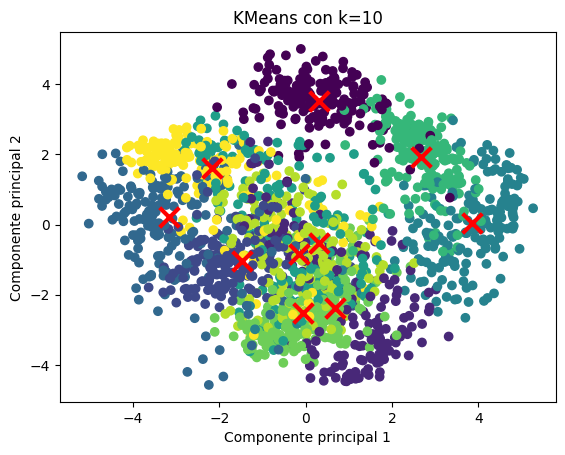

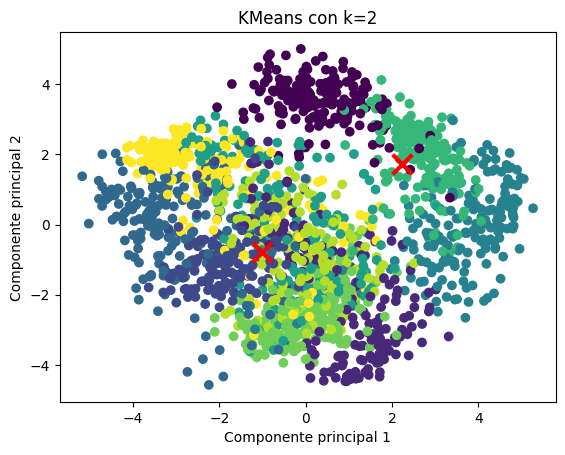

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

# Creamos una función para graficar los resultados
def plot_clusters_HAR(X, y, kmeans, title):
    y = y.cat.codes
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
    plt.title(title)
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    plt.show()
def plot_clusters_MNIST(X, y, kmeans, title):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
    plt.title(title)
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    plt.show()

har = fetch_openml(name='har')
X = pd.DataFrame(har.data, columns=har.feature_names)
y = pd.Series(har.target)

# Normalizamos las variables
X = (X - X.mean()) / X.std()

pca = PCA()
pca.fit(X)

# Varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f'Número de componentes para el 80% de la varianza: {n_components}')

plt.plot(cumulative_variance)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()


pca = PCA(n_components=n_components)
X_transformed = pca.fit_transform(X)

kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit(X_transformed)

kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X_transformed)

plot_clusters_HAR(X_transformed, y, kmeans_6, 'KMeans con k=6')
plot_clusters_HAR(X_transformed, y, kmeans_2, 'KMeans con k=2')




digits = load_digits()
X = digits.data
y = digits.target

# Normalizamos las variables
X = (X - X.mean()) / X.std()

pca = PCA()
pca.fit(X)

# Varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f'Número de componentes para el 80% de la varianza: {n_components}')


plt.plot(cumulative_variance)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

pca = PCA(n_components=n_components)
X_transformed = pca.fit_transform(X)

kmeans_10 = KMeans(n_clusters=10)
kmeans_10.fit(X_transformed)

kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X_transformed)


plot_clusters_MNIST(X_transformed, y, kmeans_10, 'KMeans con k=10')
plot_clusters_MNIST(X_transformed, y, kmeans_2, 'KMeans con k=2')

#La ganancia de usar PCA en conjunto con KMeans es que PCA reduce la dimensionalidad del dataset, 
#permitiendo que KMeans trabaje con una cantidad menor de variables. 
#Esto puede resultar en una mejora en el rendimiento de KMeans y una reducción en el tiempo de ejecución.
# Además, al reducir la dimensionalidad, es posible visualizar los resultados de KMeans en un gráfico de dos dimensiones, 
#lo que puede ayudar a interpretar los resultados y encontrar patrones en los datos.

## Segunda Parte (Clase 3 y 4)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [8]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [11]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


In [ ]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [ ]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [ ]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

In [ ]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [14]:

def split(df: pd.DataFrame, target_col: str, train_size=0.7, val_size=0.2, test_size=0.1):

    datalengh = len(df)

    end_train = (train_size * datalengh)
    end_val = (end_train + val_size)* datalengh

    X = df.drop([target_col])
    Y = df[target_col]

    X_train = X[:end_train]
    Y_train = Y[:end_train]
    
    X_val = X[end_train:end_val]
    Y_val = Y[end_train:end_val]

    X_test = X[end_val:]
    Y_test = Y[end_val:]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test




### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`